In [1]:
## IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
## LOADING THE DATASET AND CONVERTING INTO DATAFRAME
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### 1. RIDGE TRACE AND ESTIMATING RIDGE PARAMETER

In [3]:
#### SEPARATING INTO FEATURES AND TARGET VARIABLE
X = df.iloc[:, 0:11]
y = df['target']


In [4]:
X = np.array(X)
n_alphas = 25
alphas = np.logspace(0, 1, 25)/10

In [5]:
coefs = []
for a in alphas:
    model = linear_model.Ridge(alpha = a , fit_intercept = False)
    model.fit(X, y)
    coefs.append(model.coef_)
    

In [6]:
coefs = np.array(coefs)
coefs = coefs.reshape((n_alphas, 11))
coefs

array([[ 0.03161817,  0.03373427, -0.39397765,  0.09236963,  0.00101956,
         0.10204866, -0.54042289,  0.2705114 ,  0.05786413,  0.04845456,
        -0.10643186],
       [ 0.03160091,  0.03376142, -0.39329395,  0.09235673,  0.00101438,
         0.10184772, -0.54043594,  0.26885561,  0.05786922,  0.04846732,
        -0.10609395],
       [ 0.0315819 ,  0.03379102, -0.39254668,  0.09234255,  0.00100874,
         0.10162649, -0.5404481 ,  0.26705681,  0.05787426,  0.04848123,
        -0.10572656],
       [ 0.03156097,  0.03382328, -0.39173044,  0.09232697,  0.0010026 ,
         0.10138292, -0.54045886,  0.26510505,  0.05787914,  0.04849636,
        -0.10532756],
       [ 0.03153793,  0.03385839, -0.39083949,  0.09230986,  0.00099592,
         0.10111477, -0.54046762,  0.26299013,  0.05788374,  0.04851283,
        -0.10489477],
       [ 0.03151257,  0.03389657, -0.3898677 ,  0.09229105,  0.00098867,
         0.10081957, -0.5404736 ,  0.26070172,  0.05788787,  0.04853071,
        -0.104

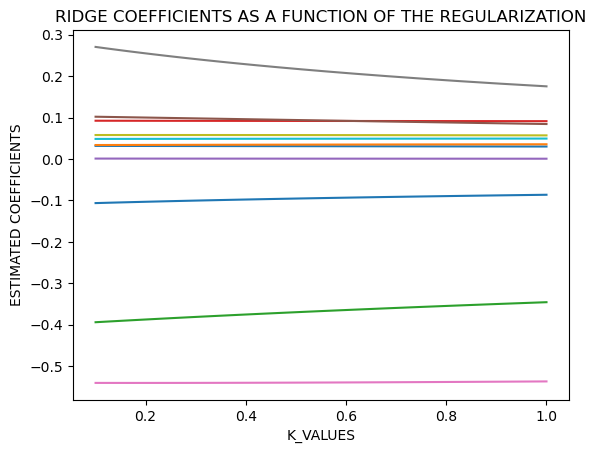

In [7]:
plot = plt.gca()
plot.plot(alphas, coefs)
plt.xlabel("K_VALUES")
plt.ylabel("ESTIMATED COEFFICIENTS")
plt.title("RIDGE COEFFICIENTS AS A FUNCTION OF THE REGULARIZATION")
plt.show()

In [8]:
#### ESTIMATING THE RIDGE PARAMETER
X = df.iloc[:, 0:8].values 
y = df['target'].values.reshape(-1, 1)  
p = 8 
n = 178  
ones = np.ones((n, 1))  

X = np.concatenate([ones, X], axis=1)


ytry = np.dot(np.transpose(y), y)  
XtrX = np.dot(np.transpose(X), X)  
Xtry = np.dot(np.transpose(X), y) 


beta_hat = np.dot(np.linalg.inv(XtrX), Xtry)


ssres = ytry - np.dot(np.transpose(beta_hat), Xtry)  
s2_hat = ssres[0, 0] / p 


ridge_param = p * s2_hat / np.dot(np.transpose(beta_hat), beta_hat)[0, 0]


print("ESTIMATED RIDGE PARAMETER IS:", ridge_param)


ESTIMATED RIDGE PARAMETER IS: 4.290739944380084


In [9]:
print("SIGMA_SQUARE_HAT/ERROR VARIANCE:", s2_hat)
X1 = df.iloc[:, 0].values.reshape(-1, 1)
y = df['target'].values.reshape(-1, 1)  
p = 2
n = 178  
ones = np.ones((n, 1))  

X1 = np.concatenate([ones, X1], axis=1)


ytry = np.dot(np.transpose(y), y)  
X1trX1 = np.dot(np.transpose(X1), X1)  
X1try = np.dot(np.transpose(X1), y) 


beta_hat = np.dot(np.linalg.inv(X1trX1), X1try)


ssres_X1  = ytry - np.dot(np.transpose(beta_hat), X1try)  
mallows_cp = (ssres_X1[0, 0] / s2_hat)-n+2*p
print("\nMALLOW'S CP FOR ALCOHOL(X1):", mallows_cp)



SIGMA_SQUARE_HAT/ERROR VARIANCE: 2.7467928395821986

MALLOW'S CP FOR ALCOHOL(X1): -139.4628541495743


#### 3. VARIABLE SELECTION

In [10]:
## CREATING A DATAFRAME FOR FEATURE VARIABLES OR REGRESSORS OR PREDICTORS

df = df[['alcohol', 'color_intensity', 'hue']] ### here, we have selected only 3 features

## ADDING THE TARGET COLUMN TO THE DATAFRAME
df['target'] = data.target

## DISPLAYING THE  FIRST 5 ROWS OF THE ENTIRE DATAFRAME CREATED ABOVE
df.head()

,alcohol,color_intensity,hue,target
0,14.23,5.64,1.04,0
1,13.20,4.38,1.05,0
2,13.16,5.68,1.03,0
3,14.37,7.80,0.86,0
4,13.24,4.32,1.04,0


In [11]:
## DISPLAYING THE CORRELATION MATRIX BEFORE PERFORMING STEPWISE REGRESSION
df.corr()

,alcohol,color_intensity,hue,target
alcohol,1.000000,0.546364,-0.071747,-0.328222
color_intensity,0.546364,1.000000,-0.521813,0.265668
hue,-0.071747,-0.521813,1.000000,-0.617369
target,-0.328222,0.265668,-0.617369,1.000000


#### Here from the above correlation matrix we found that the correlation between the target and 'color_intensity' 
#### feature is maximum, therefore, we consider it as the candidate regressor and try the 1st model.

##### PERFORMING VARIABLE SELECTION USING STEPWISE REGRESSION IN 3 DIFFERENT APPROACHES BELOW CONSIDERING 
##### THE THRESHOLD TO RETAIN A REGRESSOR IN THE EXISTING MODEL (T_IN) = 0.10.


### A. FORWARD STEP-WISE REGRESSION 

In [12]:
## CONSIDERING COLOR_INTENSITY AS THE REGRESSOR AND Y AS THE TARGET VARIABLE
Y = df.iloc[:, 3]
X = df.iloc[:, 1]

## FITTING THE MODEL
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df1 = pd.DataFrame([model1.tvalues, model1.pvalues])
df1.index = ['T-STATISTIC', 'P-VALUES']
df1

,const,color_intensity
T-STATISTIC,3.619017,3.655853
P-VALUES,0.000386,0.000338


#### Here we add or retain the feature 'color_intensity' as the regressor in the model as the P-value is 
#### very very small as compared to the t_in value = 0.10 and T-statistic value is larger than t_in value.

In [13]:
## NOW WE SHALL COMPUTE THE PARTIAL CORRELATION BETWEEN THE RESIDUES OF THIS MODEL CREATED ABOVE AND ALL THE OTHER MODELS WHERE WE SHALL REGRESS EACH
## OF THE REMAINING REGRESSORS ON THE EXISTING MODEL SO THAT WE CAN EXPLORE ALL THE RESGRESSORS WHICH WE HAVE SELECTED IN THE DATAFRAME.

In [14]:
## PREDICTIONS FROM THE FITTED MODEL1
y_pr1 = model1.predict(X)

## RESIDUES OF THE MODEL_1
res_1 = Y - y_pr1
res_1


0     -0.989885
1     -0.877977
2     -0.993438
3     -1.181729
4     -0.872648
         ...   
173    0.827153
174    0.862680
175    0.605112
176    0.685047
177    0.693928
Length: 178, dtype: float64

In [15]:
## TREATING  ALCOHOL AS TARGET AND REGRESSING IT ON THE EXISTING MODEL_1
X_1 = df.iloc[:, 0] ## treating alcohol as the target variable
X = df.iloc[:, 1]   ## treating color_intensity as the regressor variable

## REGRESSING THE MODEL
X = sm.add_constant(X)
model_2 = sm.OLS(X_1, X).fit()

## PREDICTIONS FROM THE FITTED MODEL_2
X_1_pr = model_2.predict(X)

## RESIDUES OF THIS MODEL
res_2 = X_1 - X_1_pr
print(res_2)

0      1.118046
1      0.329120
2      0.040393
3      0.844778
4      0.380599
         ...   
173    0.203911
174   -0.029558
175   -0.714409
176   -0.642214
177    0.336919
Length: 178, dtype: float64


In [16]:
## PARTIAL CORRELATION BETWEEN THE 2 SETS OF RESIDUES FROM THE ABOVE CREATED MODEL1 AND MODEL_2
pc_1 = np.corrcoef(res_1, res_2)
pc_1

array([[ 1.        , -0.58625684],
       [-0.58625684,  1.        ]])

In [17]:
## REGRESSING THE HUE ON THE EXISTING MODEL1
X_3 = df.iloc[:, 2] ## treating hue as the target variable
X = df.iloc[:, 1]   ## treating color_intensity as the regressor variable

## REGRESSING THE MODEL
X = sm.add_constant(X)
model_3 = sm.OLS(X_3, X).fit()

## PREDICTIONS FROM THE FITTED MODEL_2
X_3_pr = model_3.predict(X)

## RESIDUES OF THIS MODEL
res_3 = X_3 - X_3_pr
print(res_3)


0      0.112489
1      0.057664
2      0.104547
3      0.043617
4      0.044577
         ...   
173   -0.181528
174   -0.142107
175   -0.102907
176   -0.139211
177   -0.134356
Length: 178, dtype: float64


In [18]:
## PARTIAL CORRELATION BETWEEN THE 2 SETS OF RESIDUES FROM THE ABOVE CREATED MODEL1 AND MODEL_3
pc_1 = np.corrcoef(res_1, res_3)
pc_1

array([[ 1.        , -0.58212252],
       [-0.58212252,  1.        ]])

#### Here, we have maximum partial correlation value is -0.5862, between res_1 and res_2, therefore, we add alcohol
#### in the existing model, that is model_1.

In [19]:
## BUILDING THE MODEL INCLUDING THE ALCOHOL IN THE MODEL_1
Y = df.iloc[:, 3]
X = df.iloc[:, [0,1]]

## ## FITTING THE MODEL
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df2 = pd.DataFrame([model4.tvalues, model4.pvalues])
df2.index = ['T-STATISTIC', 'P-VALUES']
df2

,const,alcohol,color_intensity
T-STATISTIC,1.008475e+01,-9.573148e+00,8.999275e+00
P-VALUES,3.826021e-19,1.008731e-17,3.726674e-16


#### Here the p-value is much lesser than t_in value = 0.10, therefore, we retain alcohol in this model4.

#### Now, only 1 regressor 'hue' is left to explore therefore we directly add this to the model4 and display its 
#### t-statistic and p-value.


In [20]:
## BUILDING THE MODEL INCLUDING THE HUE DIRECTLY IN THE MODEL 
Y = df.iloc[:, 3]
X = df.iloc[:, [0,1,2]]

## ## FITTING THE MODEL
X = sm.add_constant(X)
model5 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df3 = pd.DataFrame([model5.tvalues, model5.pvalues])
df3.index = ['T-STATISTIC', 'P-VALUES']
df3

,const,alcohol,color_intensity,hue
T-STATISTIC,1.226875e+01,-8.276332e+00,3.896185,-8.168592e+00
P-VALUES,2.480711e-25,3.219030e-14,0.000139,6.148091e-14


#### Here, we add the hue in the final model as its p-value is much lesser than t_in value = 0.10.

#### Here model5 is our final model, Since both p-values are much smaller than 0.10 and the absolute value of 
#### t-statistics are very much large, both alcohol and hue are statistically significant and are retained in 
#### the final model.

## B. BACKWARD STEPWISE REGRESSION

#### PERFORMING VARIABLE SELECTION USING STEPWISE REGRESSION IN 3 DIFFERENT APPROACHES BELOW 
#### CONSIDERING THE THRESHOLD TO REMOVE A REGRESSOR FROM THE EXISTING MODEL (T_OUT) = 0.15.

In [21]:
## BUILDING THE MODEL INCLUDING ALL THE 3 REGRESSORS
Y = df.iloc[:, 3]
X = df.iloc[:, [0,1,2]]

## ## FITTING THE MODEL
X = sm.add_constant(X)
model_1 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df1 = pd.DataFrame([model_1.tvalues, model_1.pvalues])
df1.index = ['T-STATISTIC', 'P-VALUES']
df1

,const,alcohol,color_intensity,hue
T-STATISTIC,1.226875e+01,-8.276332e+00,3.896185,-8.168592e+00
P-VALUES,2.480711e-25,3.219030e-14,0.000139,6.148091e-14


#### Here, as we can see that as p-value for each of the above used regressors are very smaller than the threshold
#### t_out = 0.15, but for alcohol, the t-statistic value is much less than the t_out = 0.15, therefore, 
#### we eliminate alcohol, and proceed with remaining regressors in model building process.

In [22]:
## BUILDING THE MODEL INCLUDING THE REMAINING 2 REGRESSORS (COLOR_INTENSITY, HUE)
Y = df.iloc[:, 3]
X = df.iloc[:, [1,2]]

## ## FITTING THE MODEL
X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df2 = pd.DataFrame([model_2.tvalues, model_2.pvalues])
df2.index = ['T-STATISTIC', 'P-VALUES']
df2

,const,color_intensity,hue
T-STATISTIC,1.043249e+01,-1.117411,-9.470848e+00
P-VALUES,4.040165e-20,0.265350,1.929378e-17


#### Here, the p-value of color_intensity is much greater than the t_out = 0.15, threshold value, hence, we 
#### eliminate the color_intensity feature and proceed with hue in the next model building process.

In [23]:
## BUILDING THE MODEL INCLUDING THE REMAINING 1 REGRESSOR (HUE)
Y = df.iloc[:, 3]
X = df.iloc[:, 2]

## ## FITTING THE MODEL
X = sm.add_constant(X)
model_3 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df3 = pd.DataFrame([model_3.tvalues, model_3.pvalues])
df3.index = ['T-STATISTIC', 'P-VALUES']
df3

,const,hue
T-STATISTIC,1.486934e+01,-1.041134e+01
P-VALUES,6.397187e-33,4.405399e-20


#### Here, we get only 1 regressor (hue) in the final model as its p-value is much less than the threshold t_out =0.15.
#### Hence, according to the backward stepwise process, model_3 is our final built model with only 1 regressor.

### C. STEPWISE REGRESSION

#### PERFORMING VARIABLE SELECTION USING STEPWISE REGRESSION IN 3 DIFFERENT APPROACHES BELOW 
#### CONSIDERING THE THRESHOLD TO RETAIN A REGRESSOR IN THE EXISTING MODEL (T_IN) = 0.2 .

#### From the above correlation matrix we found that the correlation between the target and 'color_intensity'
#### feature is maximum, therefore, we consider it as the candidate regressor and try the 1st model.

In [24]:
## CONSIDERING COLOR_INTENSITY AS THE REGRESSOR AND Y AS THE TARGET VARIABLE
Y = df.iloc[:, 3]
X = df.iloc[:, 1]

## FITTING THE MODEL
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df1 = pd.DataFrame([model1.tvalues, model1.pvalues])
df1.index = ['T-STATISTIC', 'P-VALUES']
df1

,const,color_intensity
T-STATISTIC,3.619017,3.655853
P-VALUES,0.000386,0.000338


#### Here, p-value of color_intensity is very much less than the t_in = 0.2, hence, we retain color_intensity in the model.
#### Based, on the forward stepwise regression, we have already seen that the maximum partial correlation is between 
#### res_1 and res_2, hence, we can include the alcohol in the model.

In [25]:
## BUILDING THE MODEL INCLUDING THE ALCOHOL IN THE MODEL_1
Y = df.iloc[:, 3]
X = df.iloc[:, [0,1]]

## ## FITTING THE MODEL
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df2 = pd.DataFrame([model4.tvalues, model4.pvalues])
df2.index = ['T-STATISTIC', 'P-VALUES']
df2

,const,alcohol,color_intensity
T-STATISTIC,1.008475e+01,-9.573148e+00,8.999275e+00
P-VALUES,3.826021e-19,1.008731e-17,3.726674e-16


#### Here, we retain both these 2 regressors in the model as their p-values are lesser than the t_in = 0.2 .
#### only 1 regressor hue is left, we build the model using hue.

In [26]:
## BUILDING THE MODEL INCLUDING THE HUE DIRECTLY IN THE MODEL 
Y = df.iloc[:, 3]
X = df.iloc[:, [0,1,2]]

## ## FITTING THE MODEL
X = sm.add_constant(X)
model5 = sm.OLS(Y, X).fit()


## CREATING A DATAFRAME DISPLAYING THE T-STATISTIC VALUE AND P-VALUES OF THE REGRESSOR USED
df3 = pd.DataFrame([model5.tvalues, model5.pvalues])
df3.index = ['T-STATISTIC', 'P-VALUES']
df3

,const,alcohol,color_intensity,hue
T-STATISTIC,1.226875e+01,-8.276332e+00,3.896185,-8.168592e+00
P-VALUES,2.480711e-25,3.219030e-14,0.000139,6.148091e-14


#### Here, we add the hue in the final model as its p-value is much lesser than t_in value = 0.2 .
#### Here model5 is our final model, Since both p-values are much smaller than 0.2 and the absolute value of 
#### t-statistics are very much large, both alcohol and hue are statistically significant and are retained in 
#### the final model.